# Project 1: 당뇨병 수치 맞추기

## (1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

In [2]:
# 데이터셋 설명
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
df_X.shape, df_y.shape

((442, 10), (442,))

<AxesSubplot:>

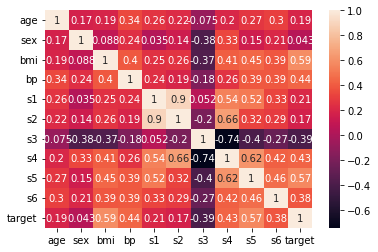

In [4]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(df_X, columns=diabetes.feature_names)
df["target"] = df_y
corr = df.corr()
sns.heatmap(corr, annot=True)

In [5]:
not_use = ["age", "sex", "s2", "s4"]
to_use = [i for i in df.columns[:-1] if i not in not_use]
df_X = df[to_use]

target과의 상관관계가 적은 변수(0.2 미만 - age, sex, s2)와 다른 feature와 상관관계가 높은 s4를 제외하였다.

## (2) 모델에 입력할 데이터 `X` 준비

In [6]:
import numpy as np

X = np.array(df_X)
type(X)

numpy.ndarray

## (3) 모델에 예측할 데이터 `y` 준비

In [7]:
y = np.array(df_y)
type(y)

numpy.ndarray

## (4) train 데이터와 test 데이터로 분리

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((353, 6), (89, 6))

## (5) 모델 준비

In [9]:
np.random.seed(42) # 재현을 위한 시드 고정
# W, b 준비
W = np.random.rand(X.shape[1])
b = np.random.rand()
W, b

(array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452]),
 0.05808361216819946)

In [10]:
# 모델 구현
def model(X, W, b):
    preds = 0
    for i in range(X.shape[1]):
        preds += X[:, i] * W[i]
    preds += b
    
    return preds

## (6) 손실함수 `loss` 정의

In [11]:
def MSE(y_pred, y_true):
    mse = ((y_pred - y_true) ** 2).mean()
    
    return mse

def loss(X, W, b, y):
    preds = model(X, W, b)
    L = MSE(preds, y)
    
    return L

## (7) `gradient` 함수 구현

In [12]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    
    return dW, db

## (8) 학습률 설정

In [13]:
LEARNING_RATE = 0.01

## (9) 모델 학습

In [14]:
n_iter = 50000
losses = []

for i in range(n_iter):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    
    losses.append(L)
    
    if (i+1) % 100 == 0:
        print(f"Iteration {i+1}: Loss {L:.4f}")

Iteration 100: Loss 6417.0014
Iteration 200: Loss 5944.7176
Iteration 300: Loss 5874.8784
Iteration 400: Loss 5813.5655
Iteration 500: Loss 5753.8161
Iteration 600: Loss 5695.4735
Iteration 700: Loss 5638.5016
Iteration 800: Loss 5582.8672
Iteration 900: Loss 5528.5379
Iteration 1000: Loss 5475.4823
Iteration 1100: Loss 5423.6696
Iteration 1200: Loss 5373.0697
Iteration 1300: Loss 5323.6534
Iteration 1400: Loss 5275.3921
Iteration 1500: Loss 5228.2578
Iteration 1600: Loss 5182.2235
Iteration 1700: Loss 5137.2625
Iteration 1800: Loss 5093.3490
Iteration 1900: Loss 5050.4577
Iteration 2000: Loss 5008.5639
Iteration 2100: Loss 4967.6437
Iteration 2200: Loss 4927.6735
Iteration 2300: Loss 4888.6306
Iteration 2400: Loss 4850.4924
Iteration 2500: Loss 4813.2374
Iteration 2600: Loss 4776.8441
Iteration 2700: Loss 4741.2919
Iteration 2800: Loss 4706.5605
Iteration 2900: Loss 4672.6303
Iteration 3000: Loss 4639.4818
Iteration 3100: Loss 4607.0964
Iteration 3200: Loss 4575.4557
Iteration 3300: L

Iteration 28500: Loss 3099.9116
Iteration 28600: Loss 3099.3547
Iteration 28700: Loss 3098.8022
Iteration 28800: Loss 3098.2539
Iteration 28900: Loss 3097.7098
Iteration 29000: Loss 3097.1698
Iteration 29100: Loss 3096.6340
Iteration 29200: Loss 3096.1022
Iteration 29300: Loss 3095.5744
Iteration 29400: Loss 3095.0506
Iteration 29500: Loss 3094.5306
Iteration 29600: Loss 3094.0146
Iteration 29700: Loss 3093.5023
Iteration 29800: Loss 3092.9938
Iteration 29900: Loss 3092.4891
Iteration 30000: Loss 3091.9880
Iteration 30100: Loss 3091.4906
Iteration 30200: Loss 3090.9968
Iteration 30300: Loss 3090.5065
Iteration 30400: Loss 3090.0198
Iteration 30500: Loss 3089.5366
Iteration 30600: Loss 3089.0568
Iteration 30700: Loss 3088.5804
Iteration 30800: Loss 3088.1074
Iteration 30900: Loss 3087.6377
Iteration 31000: Loss 3087.1713
Iteration 31100: Loss 3086.7081
Iteration 31200: Loss 3086.2482
Iteration 31300: Loss 3085.7915
Iteration 31400: Loss 3085.3380
Iteration 31500: Loss 3084.8875
Iteratio

## (10) 일반화 성능 확인

In [15]:
preds = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

2943.4923307932136


## (11) 시각화

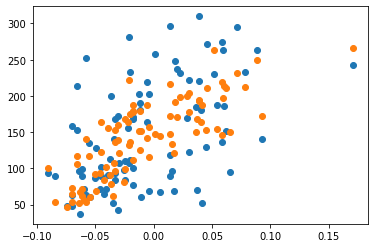

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], preds)
plt.show()

# Project 2: 자전거 수요 예측

## (1) 데이터 가져오기

In [17]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## (2) `datetime` 컬럼 변환
- `datetime` 자료형으로 변환
- 연, 월, 일, 시, 분, 초 6가지 컬럼 생성

In [19]:
train["datetime"] = pd.to_datetime(train["datetime"])

In [20]:
train["year"] = pd.DatetimeIndex(train["datetime"]).year
train["month"] = pd.DatetimeIndex(train["datetime"]).month
train["day"] = pd.DatetimeIndex(train["datetime"]).day
train["hour"] = pd.DatetimeIndex(train["datetime"]).hour
train["minute"] = pd.DatetimeIndex(train["datetime"]).minute
train["second"] = pd.DatetimeIndex(train["datetime"]).second

In [21]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) 데이터 개수 시각화
- year, month, day, hour, minute, second
- 6개 그래프 함께 시각화

<AxesSubplot:xlabel='second', ylabel='count'>

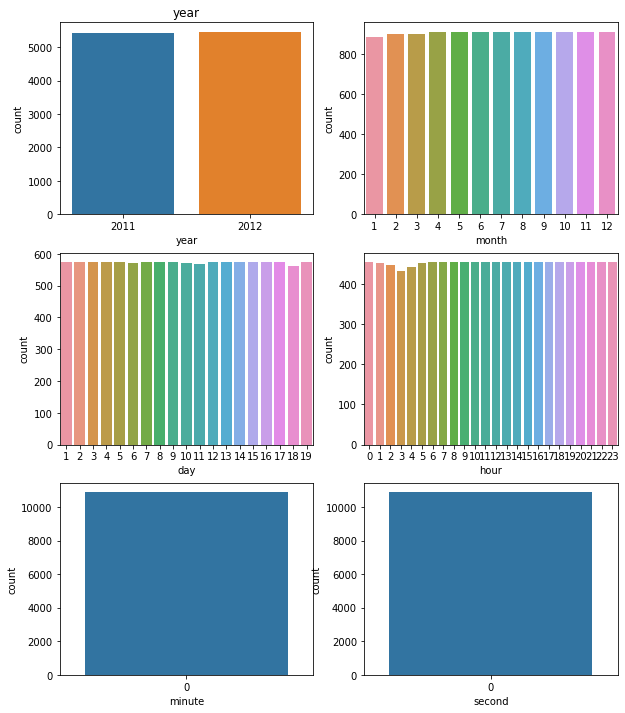

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axs = plt.subplots(3, 2, figsize=(10, 12))
axs[0, 0].set_title("year")
sns.countplot(data=train, x="year", ax=axs[0, 0])
sns.countplot(data=train, x="month", ax=axs[0, 1])
sns.countplot(data=train, x="day", ax=axs[1, 0])
sns.countplot(data=train, x="hour", ax=axs[1, 1])
sns.countplot(data=train, x="minute", ax=axs[2, 0])
sns.countplot(data=train, x="second", ax=axs[2, 1])

minute과 second는 0밖에 없으므로 학습 시 제외한다.

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

### feature selection

In [23]:
train = train.drop(["datetime", "minute", "second"], axis=1)

In [24]:
# ordinal 데이터 -> one-hot encoding
season = pd.get_dummies(train["season"], prefix="season")
weather = pd.get_dummies(train["weather"], prefix="weather")
train = train.drop(["season", "weather"], axis=1)
train = pd.concat([train, season, weather], axis=1)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,...,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,3,13,16,2011,...,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,2011,...,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,2011,...,1,2,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,2011,...,1,3,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,2011,...,1,4,1,0,0,0,1,0,0,0


In [25]:
# target을 맨 끝으로
y = train["count"]
train = train.drop("count", axis=1)
train = pd.concat([train, y], axis=1)

<AxesSubplot:>

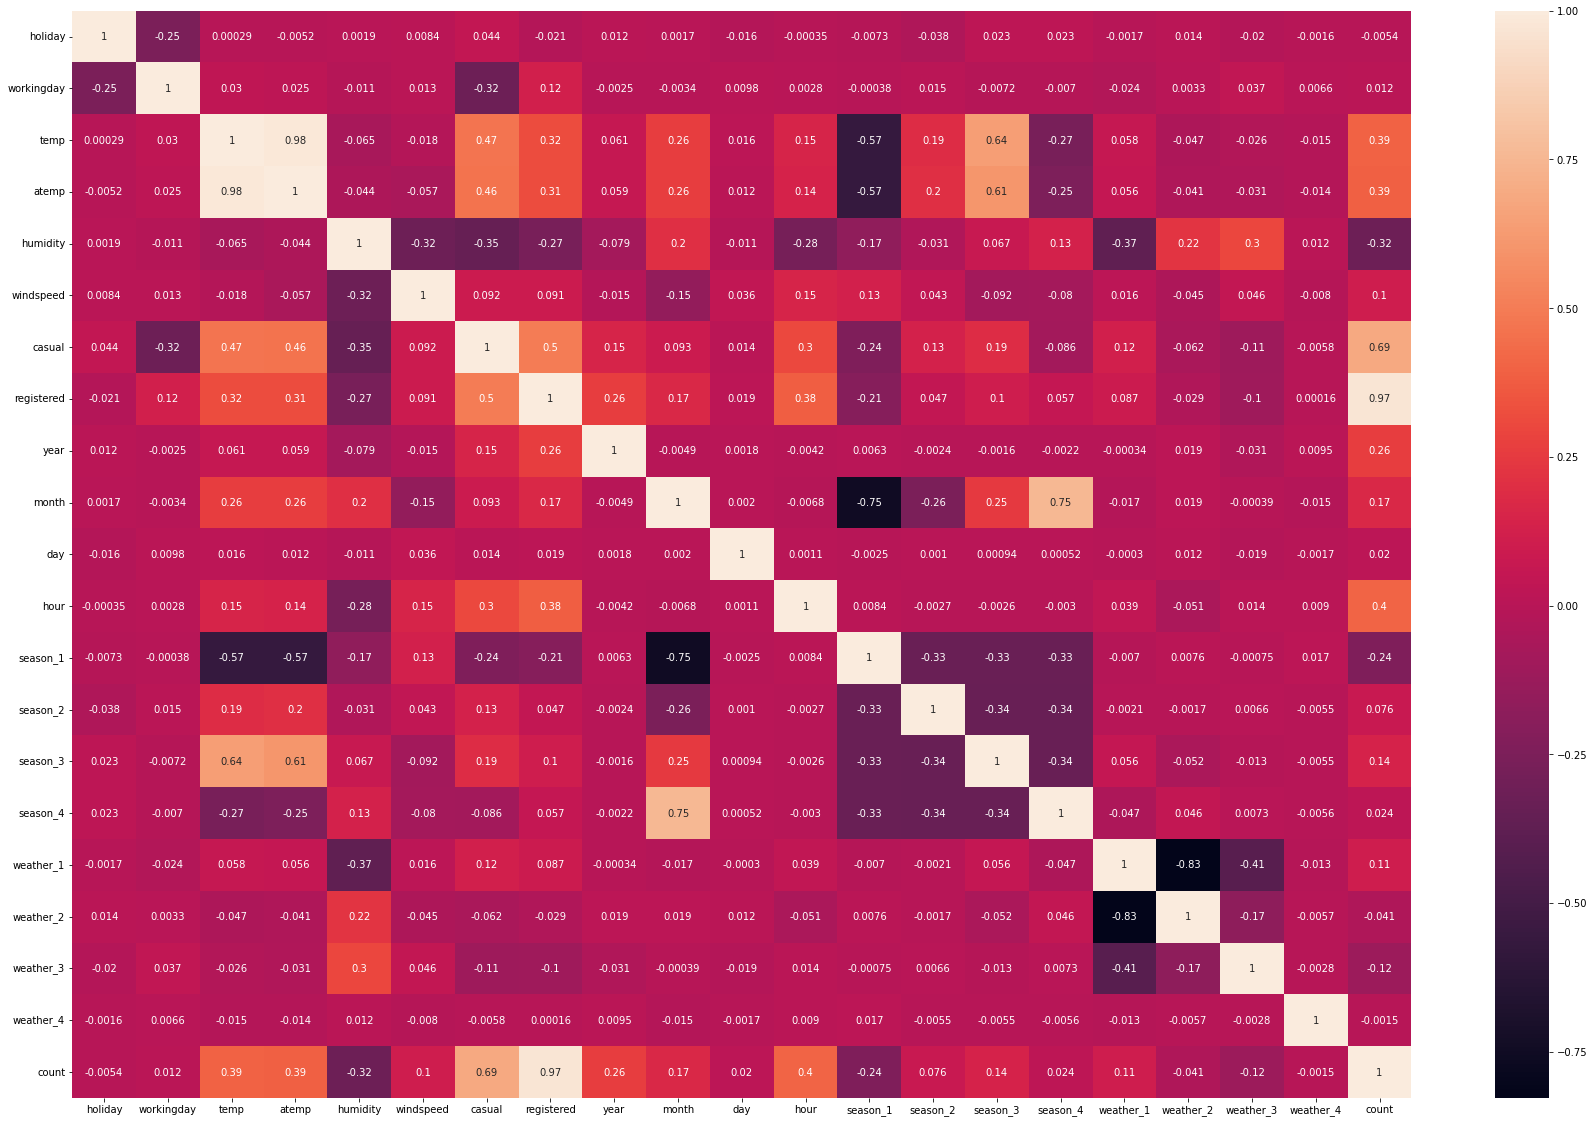

In [26]:
# 데이터 상관관계 확인
corr = train.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=corr, annot=True)

registered는 target과 너무 강한 상관관계를 가지므로 일단 제외한다. <br>
temp와 atemp 간에 강한 상관관계가 있으므로 하나만 선택한다. <br>
또한 count와 상관관계가 0.2 이상인 feature만 선택해주었다.

### X, y 분리

In [27]:
# X, y 컬럼 선택
to_use = ["temp", "humidity", "year", "hour", "season_1", "casual"]
X = train[to_use]
y = train["count"]

In [28]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8708, 6), (2178, 6))

## (5) Linear Regression 모델 학습

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## (6) 예측값 출력 및 손실함수값 계산

In [30]:
from sklearn.metrics import mean_squared_error

preds = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, preds)
rmse = mse ** 0.5

print(f"RMSE: {rmse:.4f}")

RMSE: 117.5788


## (7) 예측 결과 시각화
- x축: `temp`, `humidity`, y축: `count`

### x축 `temp`

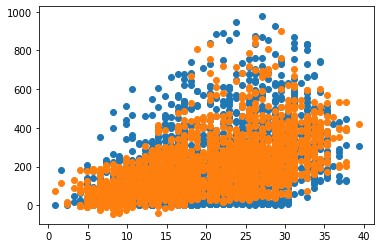

In [32]:
plt.scatter(X_test["temp"], y_test)
plt.scatter(X_test["temp"], preds)
plt.show()

### x축 `humidity`

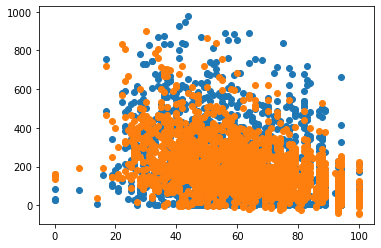

In [33]:
plt.scatter(X_test["humidity"], y_test)
plt.scatter(X_test["humidity"], preds)
plt.show()

## 회고

- 많은 feature를 쓴다고 다 좋은 게 아니다 -> feature selection의 중요성을 느꼈다.
- 이번에는 feature 선택의 기준을 단순하게 하였다. VIF를 쓰는 등 좀 더 통계적인 방법을 이용해봐도 될 것 같다.
- feature와 target의 상관관계가 매우 높은 경우 오히려 예측에 너무 영향을 준다는 것을 깨달았다.
- 현재 선택한 feature에서 상관관계가 1인 registered만 추가했을 뿐인데 RMSE가 0으로 떨어진다.
- 정형 데이터 분석하는 게 굉장히 오랜만이라 재밌었지만 공부해야할 게 산더미라는 것을 느낄 수 있었다.